<a href="https://colab.research.google.com/github/anshupandey/Working_with_Large_Language_models/blob/main/WWL_UC_Retail_Restaurant_creating_high_quality_visual_assets_with_gemini_and_imagen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create High Quality Visual Assets with Imagen and Gemini




## Overview

[Imagen on Vertex AI](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview) lets developers quickly generate high-quality images from simple text descriptions. Build and edit innovative AI-powered imagery with ease.

### Objectives

In this notebook, you will create high quality visual assets for a restaurant menu using Imagen and Gemini. You will:

- Generate an image prompt with Gemini Pro
- Use Imagen to create high quality images using prompts
- Implement a short pipeline to produce highly-detailed visual assets

### Costs

- This notebook uses billable components of Google Cloud:
  - Vertex AI

- Learn about [Vertex AI pricing](https://cloud.google.com/vertex-ai/pricing) and use the [Pricing Calculator](https://cloud.google.com/products/calculator/) to generate a cost estimate based on your projected usage.

## Getting Started

### Install Vertex AI SDK for Python

In [1]:
! pip install --quiet --upgrade --user google-cloud-aiplatform

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment. This step is not required if you are using [Vertex AI Workbench](https://cloud.google.com/vertex-ai-workbench).

In [2]:
import sys

# Additional authentication is required for Google Colab
if "google.colab" in sys.modules:
    # Authenticate user to Google Cloud
    from google.colab import auth

    auth.authenticate_user()

### Define Google Cloud project information and initialize Vertex AI

Initialize the Vertex AI SDK for Python for your project:

In [3]:
# Define project information
PROJECT_ID = "jrproject-402905"  # @param {type:"string"}
LOCATION = "us-central1"  # @param {type:"string"}

# Initialize Vertex AI
import vertexai
vertexai.init(project=PROJECT_ID, location=LOCATION)

## Image Generation

### Load the image generation model

The model names from Vertex AI Imagen have two components:
* Model name
* Version number

For example, `imagegeneration@005` represent the **005** version of **imagegeneration** model.

`imagegeneration@005` is also known as [Imagen 2](https://cloud.google.com/blog/products/ai-machine-learning/imagen-2-on-vertex-ai-is-now-generally-available).



In [4]:
from vertexai.preview.vision_models import ImageGenerationModel
imagen_model = ImageGenerationModel.from_pretrained("imagegeneration@005")

### Generate your first image

The `generate_image` function is used to generate images.

All you need to input is a simple text prompt.

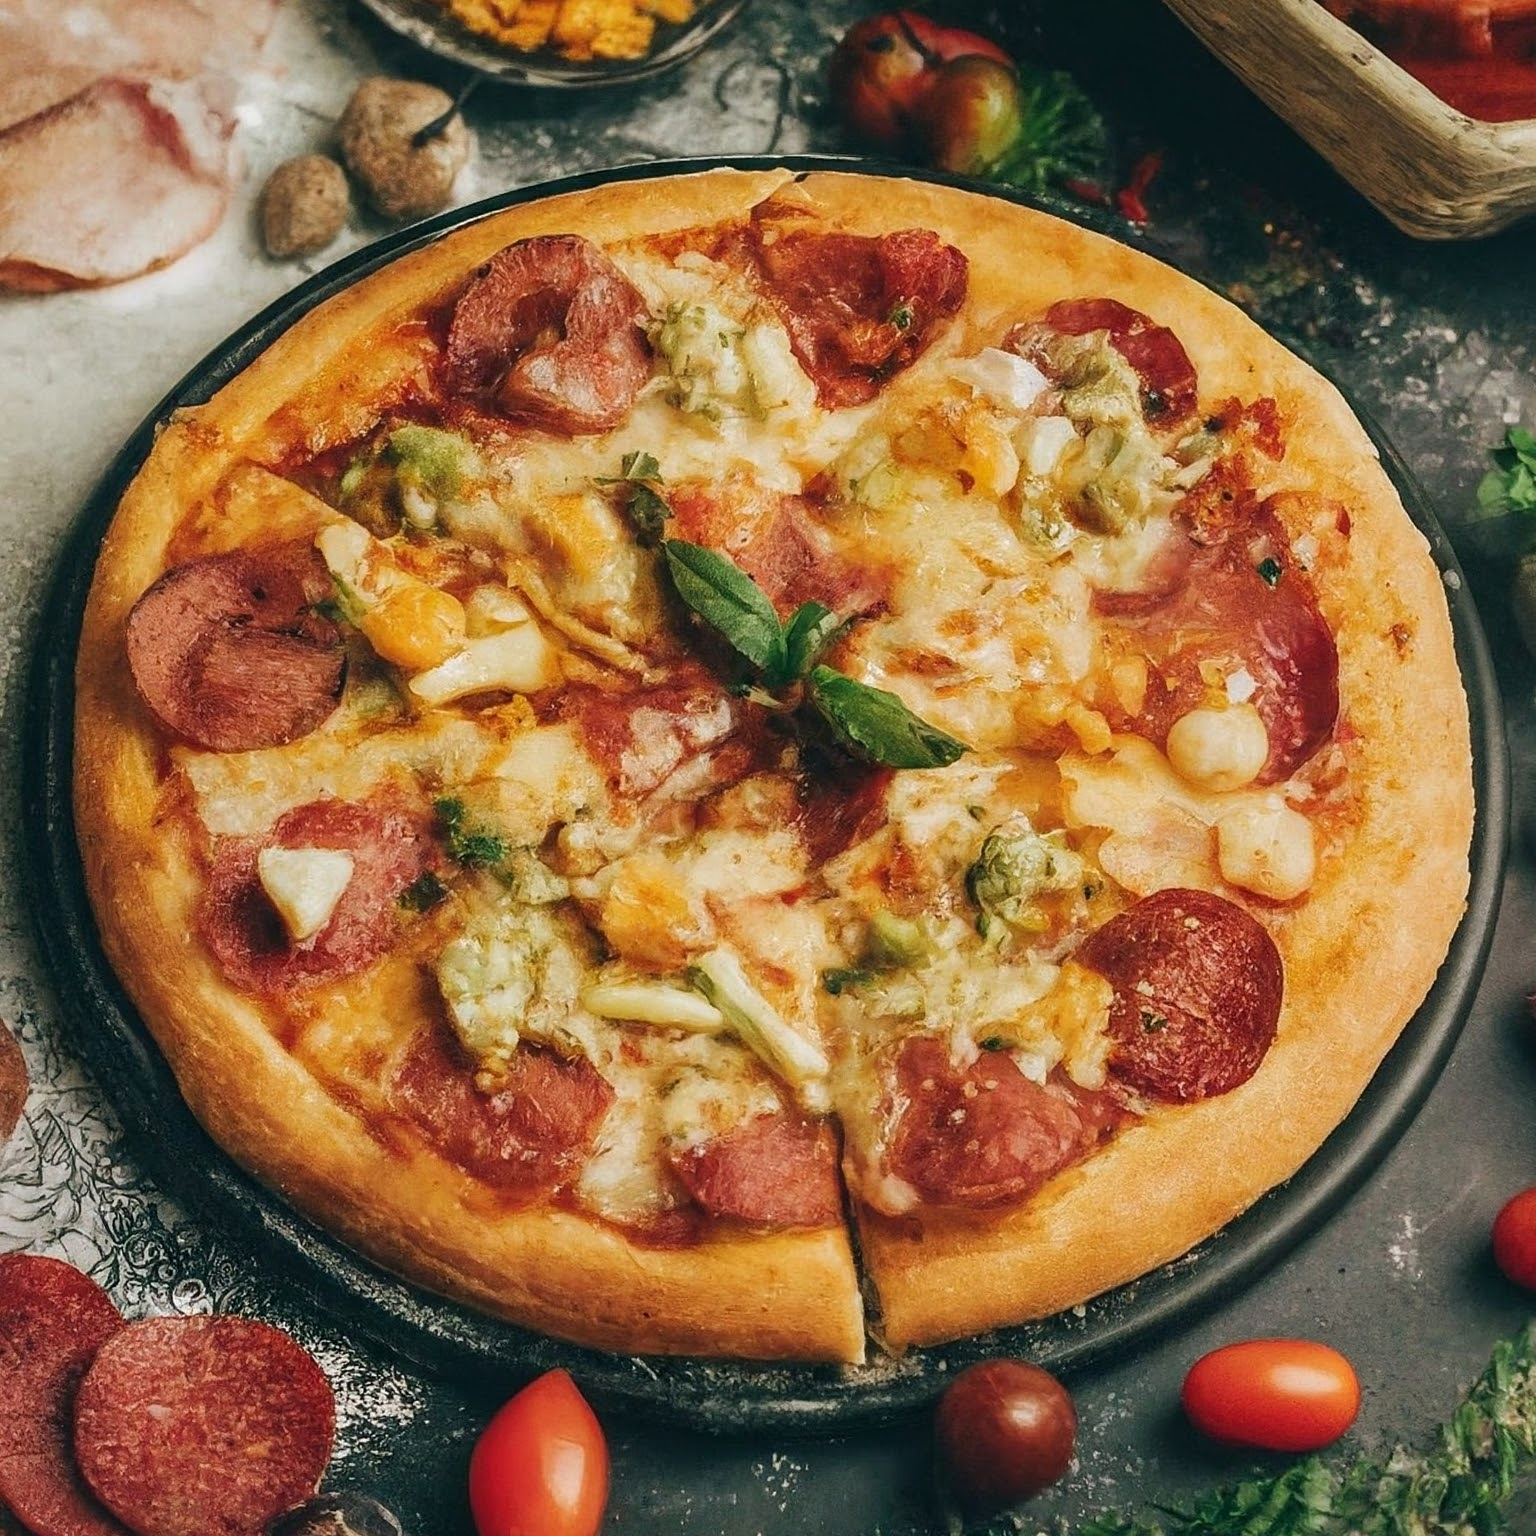

In [5]:
image_prompt = "A delicious pizza"

response = imagen_model.generate_images(prompt=image_prompt,)

response.images[0].show()

### Generating more than one image

You can currently generate up to **4** images at a time with Imagen. Imagen provides several variations based on your prompt.

You will do that in the cell below. An axuillary function to display images in grid is also provided.

In [6]:
import math
import matplotlib.pyplot as plt


# An auxiliary function to display images in grid
def display_images_in_grid(images):
    nrows = math.ceil(len(images) / 4)  # Display at most 4 images per row
    ncols = min(len(images) + 1, 4)  # Adjust columns based on the number of images

    # Create a figure and axes for the grid layout.
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

    for i, ax in enumerate(axes.flat):
        if i < len(images):
            ax.imshow(images[i]._pil_image)
            ax.set_aspect("equal")
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            ax.axis("off")

    plt.tight_layout()
    plt.show()

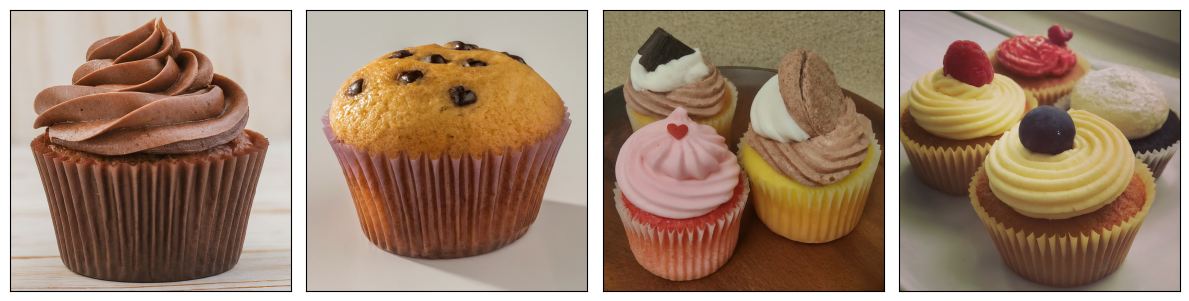

In [7]:
image_prompt = "delicious cupcakes"

response = imagen_model.generate_images(
    prompt=image_prompt,
    number_of_images=4,
)

display_images_in_grid(response.images)

### Load the Gemini Pro model

To load the Gemini Pro model, provide **gemini-pro** as an argument to **GenerativeModel** constructor.

In [8]:
from vertexai.preview.generative_models import GenerativeModel

gemini_pro_model = GenerativeModel("gemini-pro")

### Use Gemini to generate text content

The `generate_content` function can be used to generate content with Gemini Pro model. You just need to provide a simple textual prompt.

In [9]:
# Provide text prompt and invoke generate_content
text_prompt = "What are the steps to open a restaurant?"

responses = gemini_pro_model.generate_content(
    contents=text_prompt,
    stream=True,
)

for res in responses:
    print(res.text)

##
 Opening a Restaurant: A Step-by-Step Guide

Opening a restaurant is
 an exciting venture, but it requires careful planning and execution. Here's a step-
by-step guide to help you navigate the process:

**1. Develop Your Concept:**
* **Define your restaurant type:** Casual, fine dining, fast food,
 etc.
* **Choose your cuisine:** Italian, Mexican, Indian, etc.
* **Develop your target audience:** Business professionals, families, young adults, etc.

* **Name and brand your restaurant:** Create a unique and memorable identity.

**2. Conduct Market Research:**
* **Analyze the local market:** Understand competition, demographics, and food trends.
* **Evaluate customer needs:**
 Identify unmet demands or niche markets.
* **Project financial viability:** Estimate startup costs, revenue potential, and profitability.

**3. Create a Business Plan:**
* **Outline your concept, target audience, and market analysis.**
*
 **Define your menu, pricing strategy, and marketing plan.**
* **Project fin

To improve the user experience and reproducibility, you will define a generation config and create a function to boostrap content generation with Gemini Pro.

In [10]:
from IPython.display import display, Markdown, Latex

from vertexai.preview.generative_models import GenerationConfig


# Provide text prompt and invoke generate_content
def generate_content(prompt):
    # Define generation config to improve reproducibility
    generation_config = GenerationConfig(
        temperature=0.5,
        top_p=0.8,
        top_k=10,
        candidate_count=1,
        max_output_tokens=1024,
    )

    responses = gemini_pro_model.generate_content(
        contents=text_prompt,
        generation_config=generation_config,
        stream=True,
    )

    output = ""
    for res in responses:
        output += res.text.strip()

    return output

In [11]:
text_prompt = "What are the steps to open a restaurant?"
response = generate_content(text_prompt)

display(Markdown(response))

##Opening a Restaurant: A Step-by-Step Guide

Opening a restaurant isan exciting but challenging endeavor. It requires careful planning, execution, and a passion for food andhospitality. Here's a step-by-step guide to help you navigate the process:

**1. Concept and Planning:**

* **Develop aunique concept:** What kind of restaurant do you want to open? What cuisine will you serve? Who is your target audience? 
* **Create a business plan:** This should include your concept, market analysis, financial projections, and operational plan.
* **Secure funding:** Determine how much capital you need and explore funding options like loans, investors, or personal savings.

**2. Legalities and Permits:**

* **Choose a business structure:** Decide whether you want to operate as a sole proprietorship, partnership, LLC, or corporation.
* **Obtain necessary licenses and permits:** These vary by location, but typically include a business license, foodservice license, health permit, and liquor license (if applicable).
* **Comply with regulations:** Ensure your restaurant meets all health and safety regulations.

**3. Location and Lease:**

* **Find the right location:** Consider factors like demographics, competition, accessibility, and visibility.
* **Negotiate alease agreement:** Secure a lease that fits your budget and operational needs.
* **Design and build-out:** Design the layout of your restaurant and build it according to your concept and budget.

**4. Equipment and Supplies:**

* **Purchase kitchen equipment:** This includes ovens, stoves, refrigerators, freezers,and other essential appliances.
* **Acquire furniture and décor:** Choose furniture that fits your concept and creates a comfortable ambiance.
* **Stock up on supplies:** This includes tableware, silverware, glassware, and cleaning supplies.

**5. Staffing and Hiring:**

* **Develop a staffing plan:** Determine the numberand types of staff you need, including chefs, servers, bartenders, and bussers.
* **Recruit and hire qualified staff:** Look for experienced and passionate individuals who align with your restaurant's values.
* **Train your staff:** Provide proper training on food preparation, service protocols, and safety procedures.

**6. Menu Development and Pricing:**

* **Create a menu that reflects your concept:** Offer a variety of dishes that appeal to your target audience.
* **Set competitive prices:** Consider your costs, market research, and desired profit margin.
* **Design an appealing menu:** Make sure your menu is easy to read andvisually appealing.

**7. Marketing and Promotion:**

* **Develop a marketing strategy:** Utilize online and offline channels to reach your target audience.
* **Create a website and social media presence:** Showcase your restaurant's concept, menu, and ambiance.
* **Run promotions and events:** Offer special deals andevents to attract customers.

**8. Opening and Operations:**

* **Soft opening:** Conduct a soft opening to test your operations and gather feedback before the official launch.
* **Grand opening:** Celebrate your official opening with special promotions and events.
* **Monitor and adjust:** Continuously monitor your operations,customer feedback, and financial performance to make necessary adjustments.

**Additional Resources:**

* **U.S. Small Business Administration (SBA):** https://www.sba.gov/business-guide/plan-your-business/write-your-business-plan
* **National Restaurant Association:** https://restaurant.org/
* **SCORE:** https://www.score.org/

**Remember:** Opening a restaurant is a complex process that requires dedication, hard work, and a strong understanding of the industry. By following these steps and utilizing available resources, you can increase your chances of success.

### Generate a restaurant menu with Gemini Pro



In [12]:
text_prompt = (
    "Provide a menu for an Italian restaurant. Give each menu item a brief description."
)
response = generate_content(text_prompt)

display(Markdown(response))

##Antipasti (Starters)

* **Bruschetta al Pomodoro** -Toasted bread topped with fresh tomatoes, garlic, and basil. (€8)
***Frittura di Calamari** - Lightly fried calamari with aioli dipping sauce. (€12)
* **Carpaccio di Manzo** - Thinly sliced beef tenderloin with shaved Parmesan cheese, arugula, and a balsamic glaze. (€16)
* **Insalata Caprese** -Fresh mozzarella, tomatoes, and basil drizzled with olive oil and balsamic vinegar. (€10)

## Primi Piatti (First Courses)

* **Spaghetti alla Carbonara** - Spaghetti with pancetta, eggs, and Parmesan cheese. (€14)
* **Lasagna Bolognese** - Layers of pasta, meat sauce, and béchamel sauce. (€16)
* **Risotto ai Funghi** - Creamy risotto with assorted mushrooms and Parmesancheese. (€15)
* **Gnocchi al Pesto** - Pillowy potato dumplings with fresh basil pesto. (€13)

## Secondi Piatti (Main Courses)

* **Saltimbocca alla Romana** - Veal scaloppini topped with prosciutto and sage, served with a white winesauce. (€22)
* **Pollo al Limone** - Chicken breast pan-fried with lemon and white wine, served with roasted vegetables. (€18)
* **Salmone al Forno** - Baked salmon with fresh herbs and a lemon-butter sauce. (€20)
* **Bistecca Fiorentina** - Grilled T-bone steak, seasoned with salt and pepper. (€28)

## Contorni (Side Dishes)

* **Patate al Forno** - Roasted potatoes with rosemary and garlic. (€5)
* **Verdure Grigliate** - Grilled seasonal vegetables. (€6)
* **Insalata Mista** - Mixed green salad with balsamic vinaigrette. (€4)

## Dolci (Desserts)

* **Tiramisu** - Classic Italian coffee-flavored dessert with ladyfingers, mascarpone cheese, and cocoa powder. (€8)
* **Panna Cotta**- Creamy vanilla bean custard topped with fresh berries. (€7)
* **Gelato** - Assorted flavors of Italian ice cream. (€6)
* **Cannoli** - Crispy pastry shells filled with ricotta cheese and candied fruit. (€5)

## Bevande (Drinks)

* **Espresso**(€3)
* **Cappuccino** (€4)
* **Latte** (€4)
* **Italian Wine** - Selection of red and white wines by the glass or bottle.
* **Soft Drinks** (€3)
* **Mineral Water** (€2)

**Please note:** Pricesare subject to change.

### Improve an existing image prompt Gemini Pro

Here you'll use the image prompt technique of including a **style**, a **subject**, and a **context / background**.

PROMPT: 
  Rewrite "A delicious pizza" into an image prompt.
  For example: A sketch of a modern apartment building surrounded by skyscrapers.
  "A sketch" is a style.
  "A modern apartment building" is a subject.
  "Surrounded by skyscrapers" is a context and background.

  Here are a few "styles" to get inspiration from:
  - A studio photo
  - A professional photo

  Here are a few "context and background" to inspiration from:
  - In a kitchen on a wooden surface with natural lighting
  - On a marble counter top with studio lighting
  - In an Italian restaurant

  Rewritten prompt:

  Only provide the final prompt, no other text

RESPONSE: 
  Aphoto of a delicious pizza on a rustic wooden table in a sunlit Italian restaurant.


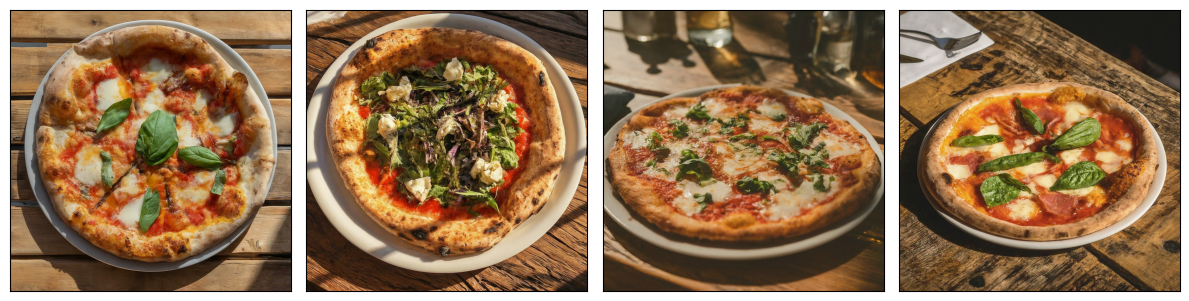

In [14]:
image_prompt = "A delicious pizza"

prompt_template = """
  Rewrite "{image_prompt}" into an image prompt.
  For example: A sketch of a modern apartment building surrounded by skyscrapers.
  "A sketch" is a style.
  "A modern apartment building" is a subject.
  "Surrounded by skyscrapers" is a context and background.

  Here are a few "styles" to get inspiration from:
  - A studio photo
  - A professional photo

  Here are a few "context and background" to inspiration from:
  - In a kitchen on a wooden surface with natural lighting
  - On a marble counter top with studio lighting
  - In an Italian restaurant

  Only provide the final prompt, no other text
  Rewritten prompt:

"""

text_prompt = prompt_template.format(image_prompt=image_prompt)
rewritten_image_prompt = generate_content(text_prompt)

print(f"PROMPT: {text_prompt}")
print(f"RESPONSE: \n  {rewritten_image_prompt}")

response = imagen_model.generate_images(
    prompt=rewritten_image_prompt,
    number_of_images=4,
)

display_images_in_grid(response.images)

## Visual asset pipeline

Now that you have seen Gemini Pro's capabilities to create a complete restaurant menu and how it can enhance the quality of image prompts, the next step is to establish a formal asset pipeline that leverages these abilities.

### Standardize the output as JSON format

In the previous attempts, Gemini Pro returned either in Markdown or plaintext responses, which made it difficult to integrate with further steps.

To solve this, we'll ask that Gemini standardize the response in JSON format. This will make the response easier to process and integrate downstream.

In [15]:
text_prompt = """
  Provide a menu for an Italian restaurant in a JSON fomat.
  Each item in the menu should have a name and a description.
  The item description should contain the ingredients and how the item was prepared.
  Don't include "of the day" items such as "soup of the day".

  The parent fields should be starters, main courses, desserts, and drinks.
  Parent fields should be lower cased.
  The child fields should be name and description.
  Do not include JSON decorator.
  """
response = generate_content(text_prompt)
print(response)

```json
{
  "starters": [
    {
      "name":"Bruschetta",
      "description": "Toasted bread topped with fresh tomatoes,garlic, basil, and olive oil."
    },
    {
      "name": "Caprese Salad",
      "description": "Fresh mozzarella, tomatoes, and basil drizzled with balsamic vinegar and olive oil."
    },
    {
      "name": "Arancini",
      "description":"Fried balls of risotto rice filled with meat, cheese, or vegetables."
    }
  ],
  "main_courses": [
    {
      "name": "Spaghetti Carbonara",
      "description": "Spaghettipasta tossed with eggs, pancetta, and Parmesan cheese."
    },
    {
      "name": "Lasagna",
      "description": "Layers of pasta, meat sauce, and cheese baked in the oven."},
    {
      "name": "Pizza Margherita",
      "description": "Pizza dough topped with tomato sauce, mozzarella cheese, and fresh basil."
    },
    {
      "name": "Chicken Saltimbocca",
      "description": "Chicken breast sautéed with prosciutto and sage,served with a white wine s

In [16]:
response

'```json\n{\n  "starters": [\n    {\n      "name":"Bruschetta",\n      "description": "Toasted bread topped with fresh tomatoes,garlic, basil, and olive oil."\n    },\n    {\n      "name": "Caprese Salad",\n      "description": "Fresh mozzarella, tomatoes, and basil drizzled with balsamic vinegar and olive oil."\n    },\n    {\n      "name": "Arancini",\n      "description":"Fried balls of risotto rice filled with meat, cheese, or vegetables."\n    }\n  ],\n  "main_courses": [\n    {\n      "name": "Spaghetti Carbonara",\n      "description": "Spaghettipasta tossed with eggs, pancetta, and Parmesan cheese."\n    },\n    {\n      "name": "Lasagna",\n      "description": "Layers of pasta, meat sauce, and cheese baked in the oven."},\n    {\n      "name": "Pizza Margherita",\n      "description": "Pizza dough topped with tomato sauce, mozzarella cheese, and fresh basil."\n    },\n    {\n      "name": "Chicken Saltimbocca",\n      "description": "Chicken breast sautéed with prosciutto and 

In [17]:
import json
response = response.replace("```json", "").replace("```", "")
# Load the responses into a JSON format
jsonized_response = json.loads(response)
jsonized_response["starters"]

[{'name': 'Bruschetta',
  'description': 'Toasted bread topped with fresh tomatoes,garlic, basil, and olive oil.'},
 {'name': 'Caprese Salad',
  'description': 'Fresh mozzarella, tomatoes, and basil drizzled with balsamic vinegar and olive oil.'},
 {'name': 'Arancini',
  'description': 'Fried balls of risotto rice filled with meat, cheese, or vegetables.'}]

### Generating visual asset programmatically

Using the jsonized menu, you will be creating a batch of images programatically using Imagen. You will use Gemini Pro model to rewrite each description into a detailed image prompt.

In [18]:
# convert a description into an image prompt
description = jsonized_response["starters"][0]["description"]
text_prompt = prompt_template.format(image_prompt=description)
image_prompt = generate_content(text_prompt)

print(f"DESCRIPTION:\n  {description}\n")
print(f"IMAGE PROMPT:\n  {image_prompt}\n")

DESCRIPTION:
  Toasted bread topped with fresh tomatoes,garlic, basil, and olive oil.

IMAGE PROMPT:
  Astudio photo of toasted bread topped with fresh tomatoes, garlic, basil, and olive oil. The bread is placed on a wooden surface with natural lighting.



Here you will generate **starters** from the menu

ORIGINAL: Toasted bread topped with fresh tomatoes,garlic, basil, and olive oil.
IMPROVED: Aprofessional photo of toasted bread topped with fresh tomatoes, garlic, basil, and olive oilin an Italian restaurant.


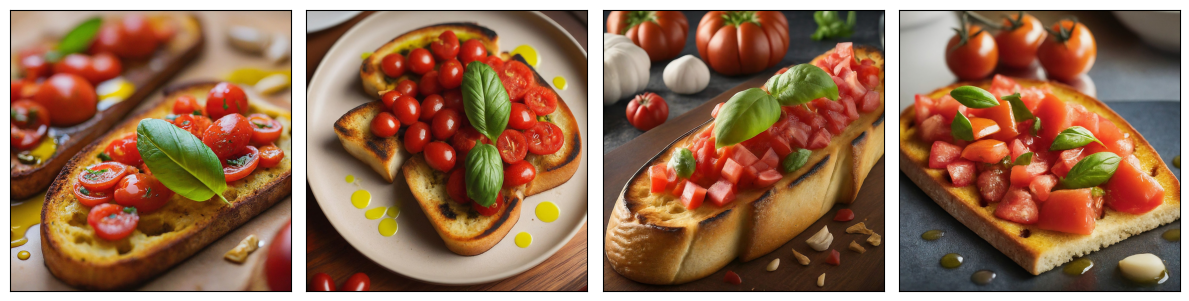


ORIGINAL: Fresh mozzarella, tomatoes, and basil drizzled with balsamic vinegar and olive oil.
IMPROVED: Aclose-up studio photo of fresh mozzarella, tomatoes, and basil on a whiteplate, drizzled with balsamic vinegar and olive oil. The plate is on adark wooden table with natural lighting.


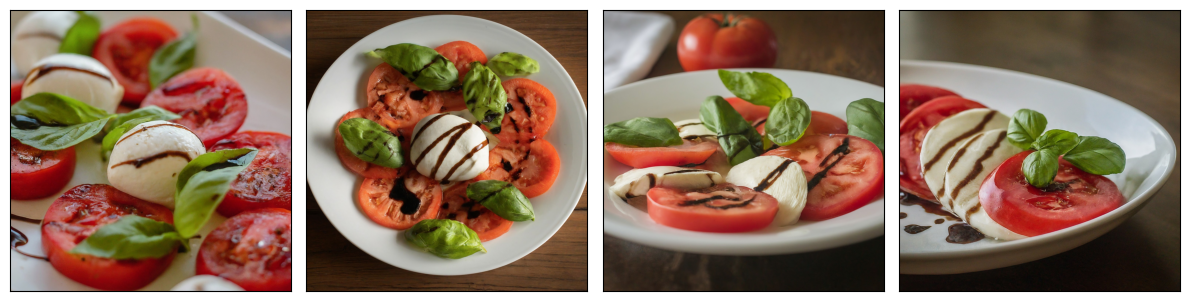


ORIGINAL: Fried balls of risotto rice filled with meat, cheese, or vegetables.
IMPROVED: Astudio photo of fried balls of risotto rice filled with meat, cheese, or vegetables,served on a white plate with a side of marinara sauce. The risotto balls aregolden brown and crispy on the outside, and the filling is visible in the center. The marinara sauce is a rich red color and has a fresh, herbyaroma. The background is a neutral gray, and the lighting is bright and even.


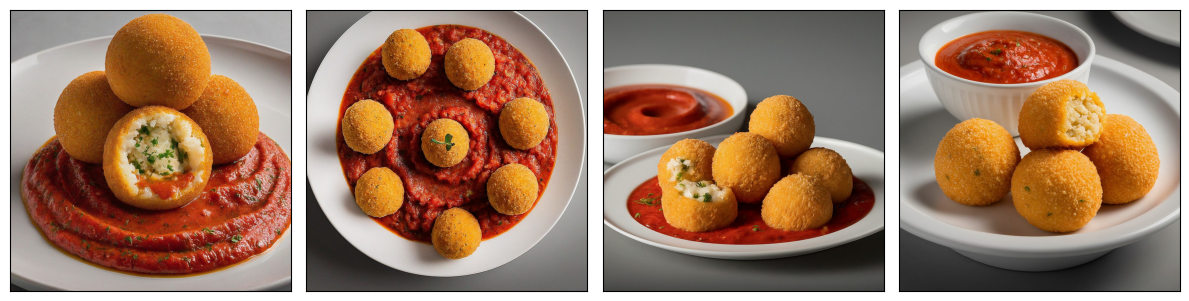

In [19]:
import time
for starter in jsonized_response["starters"]:
    text_prompt = prompt_template.format(image_prompt=starter["description"])
    image_prompt = generate_content(text_prompt)

    print(f"ORIGINAL: {starter['description']}")
    print(f"IMPROVED: {image_prompt}")
    time.sleep(55)
    response = imagen_model.generate_images(
        prompt=image_prompt,
        number_of_images=4,
    )

    display_images_in_grid(response.images)
    print()

## Conclusion

Congratulations! You have successfully created a professional restaurant menu with the help of Gemini and Imagen!

Imagen on Vertex AI can do much more that generating realistic images. Imagen allows you to edit images, generate captions, ask questions of images, and more. Explore all the features of Imagen [here](https://cloud.google.com/vertex-ai/docs/generative-ai/image/overview).

You may also explore the Imagen [prompting guide](https://cloud.google.com/vertex-ai/docs/generative-ai/image/img-gen-prompt-guide?_ga=2.128324367.-2094800479.1701746552&_gac=1.219926379.1701161688.CjwKCAiAvJarBhA1EiwAGgZl0LFQUFOFZUxfNPlzjB4T00PDiLeCIEYfY-coLbX9eUfHKr_i8VbtSBoCEJQQAvD_BwE) to enhance your prompting skills. Please note that you need to be allowlisted to see the full guide.